# Generalised Regression

In this notebook, we will build a generalised regression model on the **electricity consumption** dataset. The dataset contains two variables - year and electricity consumption.

In [43]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

In [36]:
#fetching data
elec_cons = pd.read_csv("total-electricity-consumption-us.csv",  sep = ',', header= 0 )
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [37]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [38]:
# checking NA
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

In [46]:
print(len(train))
print(len(test))
train.head()

40
11


,Year,Consumption
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651
6,1926,95164


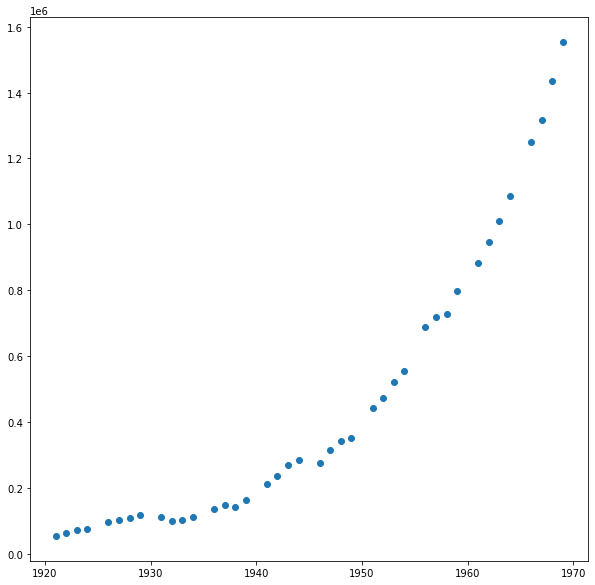

In [45]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(x='Year',y='Consumption',data=train)
plt.show()

In [59]:
X1 = PolynomialFeatures(1).fit_transform(train.Year.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(train.Year.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(train.Year.values.reshape(-1,1))

In [60]:
Y=train.Consumption
fit=sm.GLS(Y, X3).fit()

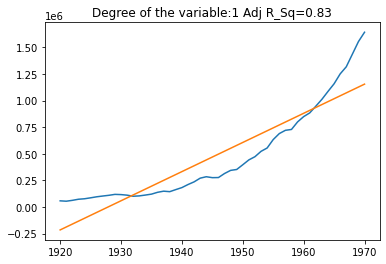

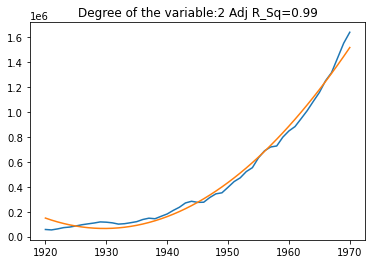

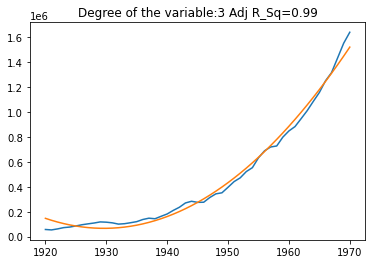

In [69]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
fitted=[]
degrees = [1, 2, 3]

for degree in degrees:
    X= PolynomialFeatures(degree).fit_transform(elec_cons.Year.values.reshape(-1,1))
    Y=elec_cons.Consumption
    fit=sm.GLS(Y, X).fit()
    fitted.append(fit.fittedvalues)
    fig, ax = plt.subplots()
    ax.plot(elec_cons.Year, elec_cons.Consumption)
    ax.plot(elec_cons.Year,fit.fittedvalues)
    s="Degree of the variable:"+str(degree)+" Adj R_Sq="+str(round(fit.rsquared_adj,2))
    ax.set_title(s)

In [75]:
#Random sampling taking every fifth variable as test
size = len(elec_cons.index)
index = range(0, size, 10)

train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]

In [96]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
fitted=[]
degrees = [1, 2, 3]

for degree in degrees:
    X= PolynomialFeatures(degree).fit_transform(train.Year.values.reshape(-1,1))
    Y=train.Consumption
    model=sm.GLS(Y, X).fit()
    X_test= PolynomialFeatures(degree).fit_transform(test.Year.values.reshape(-1,1))
    pred=model.predict(X_test)
    Accuracy=1-np.abs((test.Consumption-pred)/test.Consumption)
    print("Degree of the polynomials",degree,"Mean Accuracy of prediction:",Accuracy[1:].mean())

Degree of the polynomials 1 Mean Accuracy of prediction: 0.5714137617922025
Degree of the polynomials 2 Mean Accuracy of prediction: 0.8590824668650722
Degree of the polynomials 3 Mean Accuracy of prediction: 0.8625157163541057
